## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.662947  1.476838 -0.909720  1.506796  0.801166  1.928097
1  0.620924 -0.201885 -0.119805 -1.410340  1.073465 -0.314658
2  0.629849  0.208477  1.386167  0.717054  1.628990  1.946792
3  0.115285  0.815320  1.280618 -0.444881  1.631596  1.182767
4 -0.483496 -0.783898 -0.985352  0.005099  0.589162 -0.162290


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9931551	total: 57.4ms	remaining: 57.3s
1:	learn: 0.9845841	total: 58ms	remaining: 28.9s
2:	learn: 0.9767482	total: 58.7ms	remaining: 19.5s
3:	learn: 0.9683242	total: 59.3ms	remaining: 14.8s
4:	learn: 0.9603667	total: 60.1ms	remaining: 12s
5:	learn: 0.9510413	total: 60.7ms	remaining: 10.1s
6:	learn: 0.9422463	total: 61.3ms	remaining: 8.69s
7:	learn: 0.9326965	total: 61.8ms	remaining: 7.66s
8:	learn: 0.9244579	total: 62.4ms	remaining: 6.87s
9:	learn: 0.9172100	total: 62.8ms	remaining: 6.22s
10:	learn: 0.9090986	total: 63.2ms	remaining: 5.68s
11:	learn: 0.9014005	total: 63.7ms	remaining: 5.25s
12:	learn: 0.8930277	total: 64.3ms	remaining: 4.88s
13:	learn: 0.8852539	total: 64.8ms	remaining: 4.56s
14:	learn: 0.8782154	total: 65.2ms	remaining: 4.28s
15:	learn: 0.8709378	total: 65.7ms	remaining: 4.04s
16:	learn: 0.8632994	total: 66.1ms	remaining: 3.82s
17:	learn: 0.8562843	total: 66.6ms	remaining: 3.63s
18:	learn: 0.8488308	total: 67ms	remaining: 3.46

86:	learn: 0.4933243	total: 98.8ms	remaining: 1.04s
87:	learn: 0.4905564	total: 99.4ms	remaining: 1.03s
88:	learn: 0.4860142	total: 99.9ms	remaining: 1.02s
89:	learn: 0.4822518	total: 100ms	remaining: 1.01s
90:	learn: 0.4793094	total: 101ms	remaining: 1.01s
91:	learn: 0.4752929	total: 101ms	remaining: 1s
92:	learn: 0.4720444	total: 102ms	remaining: 996ms
93:	learn: 0.4676742	total: 103ms	remaining: 989ms
94:	learn: 0.4648559	total: 103ms	remaining: 982ms
95:	learn: 0.4610556	total: 103ms	remaining: 974ms
96:	learn: 0.4579751	total: 104ms	remaining: 967ms
97:	learn: 0.4545505	total: 104ms	remaining: 959ms
98:	learn: 0.4507040	total: 105ms	remaining: 957ms
99:	learn: 0.4474914	total: 106ms	remaining: 950ms
100:	learn: 0.4439257	total: 106ms	remaining: 943ms
101:	learn: 0.4408577	total: 106ms	remaining: 937ms
102:	learn: 0.4377529	total: 107ms	remaining: 930ms
103:	learn: 0.4353164	total: 107ms	remaining: 924ms
104:	learn: 0.4319225	total: 108ms	remaining: 917ms
105:	learn: 0.4293318	tota

269:	learn: 0.1415032	total: 187ms	remaining: 504ms
270:	learn: 0.1407069	total: 187ms	remaining: 503ms
271:	learn: 0.1400116	total: 188ms	remaining: 502ms
272:	learn: 0.1393616	total: 188ms	remaining: 501ms
273:	learn: 0.1385173	total: 189ms	remaining: 500ms
274:	learn: 0.1378282	total: 189ms	remaining: 498ms
275:	learn: 0.1371350	total: 189ms	remaining: 497ms
276:	learn: 0.1364585	total: 190ms	remaining: 496ms
277:	learn: 0.1356160	total: 190ms	remaining: 495ms
278:	learn: 0.1349276	total: 191ms	remaining: 493ms
279:	learn: 0.1341174	total: 191ms	remaining: 492ms
280:	learn: 0.1334048	total: 192ms	remaining: 491ms
281:	learn: 0.1326577	total: 192ms	remaining: 489ms
282:	learn: 0.1320228	total: 193ms	remaining: 488ms
283:	learn: 0.1314060	total: 193ms	remaining: 487ms
284:	learn: 0.1305950	total: 194ms	remaining: 486ms
285:	learn: 0.1298542	total: 194ms	remaining: 485ms
286:	learn: 0.1292396	total: 195ms	remaining: 484ms
287:	learn: 0.1282850	total: 195ms	remaining: 483ms
288:	learn: 

470:	learn: 0.0540684	total: 281ms	remaining: 316ms
471:	learn: 0.0538085	total: 282ms	remaining: 315ms
472:	learn: 0.0535513	total: 282ms	remaining: 315ms
473:	learn: 0.0532837	total: 283ms	remaining: 314ms
474:	learn: 0.0530507	total: 283ms	remaining: 313ms
475:	learn: 0.0527276	total: 284ms	remaining: 313ms
476:	learn: 0.0524844	total: 284ms	remaining: 312ms
477:	learn: 0.0523931	total: 285ms	remaining: 311ms
478:	learn: 0.0523030	total: 285ms	remaining: 310ms
479:	learn: 0.0521826	total: 286ms	remaining: 310ms
480:	learn: 0.0519430	total: 286ms	remaining: 309ms
481:	learn: 0.0516329	total: 287ms	remaining: 308ms
482:	learn: 0.0513303	total: 287ms	remaining: 307ms
483:	learn: 0.0512497	total: 288ms	remaining: 307ms
484:	learn: 0.0510197	total: 288ms	remaining: 306ms
485:	learn: 0.0509402	total: 288ms	remaining: 305ms
486:	learn: 0.0508616	total: 289ms	remaining: 304ms
487:	learn: 0.0505689	total: 289ms	remaining: 304ms
488:	learn: 0.0502949	total: 290ms	remaining: 303ms
489:	learn: 

656:	learn: 0.0260138	total: 369ms	remaining: 193ms
657:	learn: 0.0259176	total: 369ms	remaining: 192ms
658:	learn: 0.0258851	total: 370ms	remaining: 191ms
659:	learn: 0.0257898	total: 370ms	remaining: 191ms
660:	learn: 0.0257468	total: 371ms	remaining: 190ms
661:	learn: 0.0257154	total: 371ms	remaining: 190ms
662:	learn: 0.0255649	total: 372ms	remaining: 189ms
663:	learn: 0.0254725	total: 372ms	remaining: 188ms
664:	learn: 0.0254313	total: 373ms	remaining: 188ms
665:	learn: 0.0253439	total: 373ms	remaining: 187ms
666:	learn: 0.0253139	total: 374ms	remaining: 186ms
667:	learn: 0.0251695	total: 374ms	remaining: 186ms
668:	learn: 0.0250577	total: 374ms	remaining: 185ms
669:	learn: 0.0250284	total: 375ms	remaining: 185ms
670:	learn: 0.0249895	total: 375ms	remaining: 184ms
671:	learn: 0.0248926	total: 376ms	remaining: 184ms
672:	learn: 0.0247886	total: 376ms	remaining: 183ms
673:	learn: 0.0247552	total: 377ms	remaining: 182ms
674:	learn: 0.0247223	total: 378ms	remaining: 182ms
675:	learn: 

852:	learn: 0.0126019	total: 464ms	remaining: 79.9ms
853:	learn: 0.0125549	total: 464ms	remaining: 79.4ms
854:	learn: 0.0125381	total: 465ms	remaining: 78.8ms
855:	learn: 0.0124921	total: 465ms	remaining: 78.3ms
856:	learn: 0.0124759	total: 466ms	remaining: 77.7ms
857:	learn: 0.0124593	total: 466ms	remaining: 77.2ms
858:	learn: 0.0124429	total: 467ms	remaining: 76.6ms
859:	learn: 0.0123983	total: 467ms	remaining: 76ms
860:	learn: 0.0123823	total: 468ms	remaining: 75.5ms
861:	learn: 0.0123559	total: 468ms	remaining: 74.9ms
862:	learn: 0.0123353	total: 468ms	remaining: 74.3ms
863:	learn: 0.0123170	total: 469ms	remaining: 73.8ms
864:	learn: 0.0122896	total: 469ms	remaining: 73.2ms
865:	learn: 0.0122718	total: 469ms	remaining: 72.6ms
866:	learn: 0.0122453	total: 469ms	remaining: 72ms
867:	learn: 0.0122000	total: 470ms	remaining: 71.4ms
868:	learn: 0.0121688	total: 470ms	remaining: 70.9ms
869:	learn: 0.0121247	total: 471ms	remaining: 70.3ms
870:	learn: 0.0120844	total: 471ms	remaining: 69.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

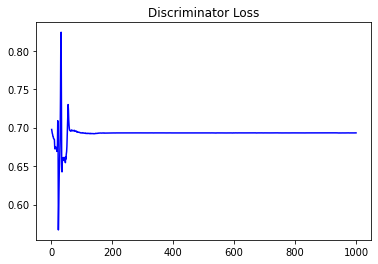

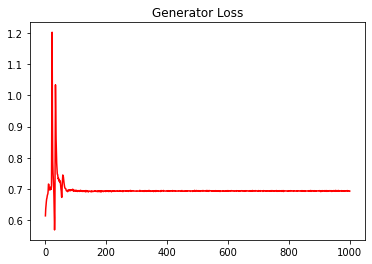

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12423391424938589


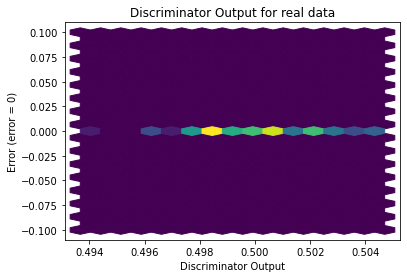

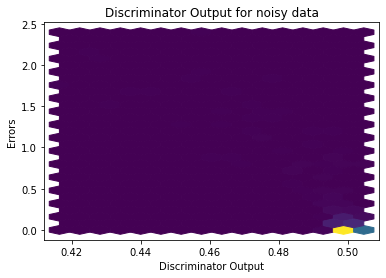

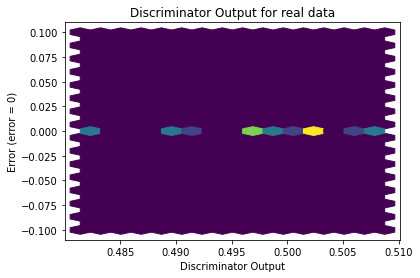

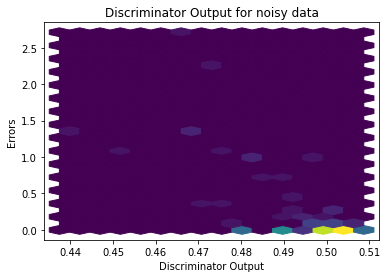

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


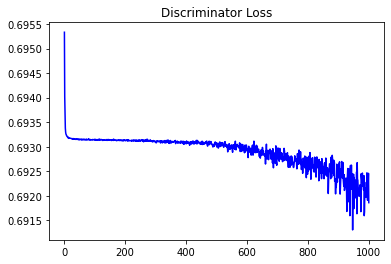

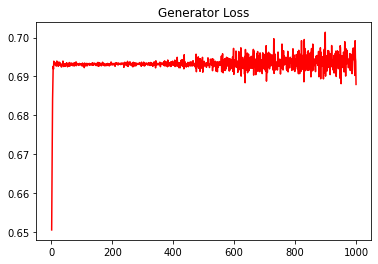

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.13579203075088708


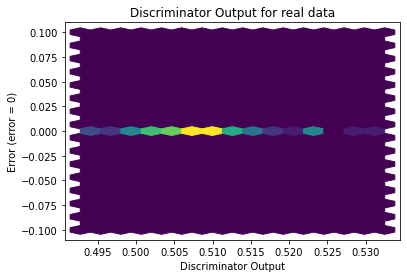

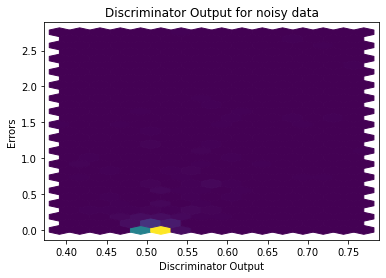

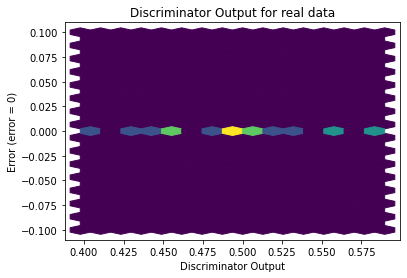

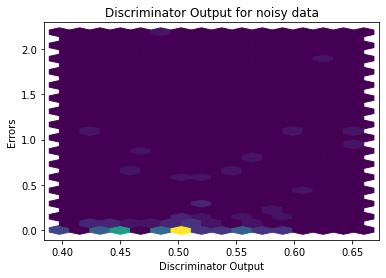

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
